# **OpenCV**

컴퓨터 비전 라이브러리. <br>
이미지나 웹캠 등을 사용하고 싶을 때 가장 많이 사용하는 라이브러리. <br>

In [ ]:
#OpenCV는 Colab에 내장되어 있습니다.
import cv2

print(cv2.__version__)

4.6.0


In [ ]:
#사진을 하나 불러와봅시다.
from google.colab import files
files.upload()

Saving bonobono.jpg to bonobono (2).jpg


{'bonobono.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x02\xa3\x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x03\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\x06\x07\x08\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x01\x02\x04\x05\x06\x07\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf9c\xb7\x87\xfb) 

In [ ]:
#d
img = cv2.imread('bonobono.jpg')

#이미지 정보를 얻어봅시다.
print(img.size)  #크기
print(img.shape) #모양
print(img.dtype) #데이터타입

2430000
(675, 1200, 3)
uint8




> 이미지 출력하기



```
cv2.imshow('img', f) #읽은 이미지를 화면에 표시한다.
cv2.waitkey() #입력 대기
cv2.destroyAllWindows() #창 닫기기
```
이 방법이 정석이지만.. colab 환경에서는 불가능하다. 대신 아래 방법을 사용한다.



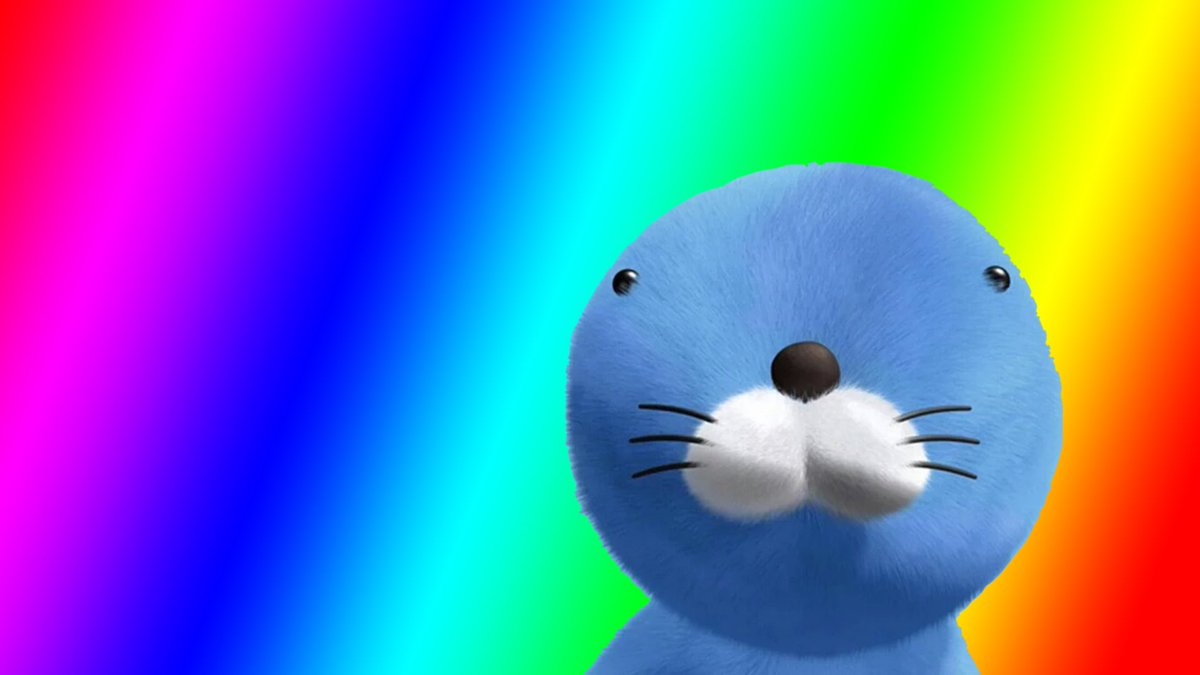

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img) #읽은 이미지를 화면에 표시한다.



> RGB 채널

색상 정보를 저장하는 채널로, 모든 색을 Red, Blue, Green의 색상 혼합으로 나타내는 것이다.

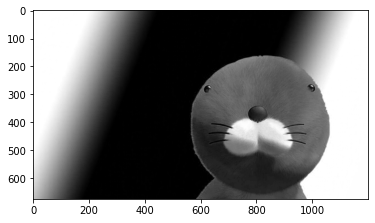

In [ ]:
#채널 나누기
b, g, r = cv2.split(img)

#각각의 채널 흑백으로 출력
#흰색은 그 색이 많다는 것, 검은색은 그 색이 적다는 것을 의미합니다.
from matplotlib import pyplot as plt
plt.imshow(r, cmap='gray')


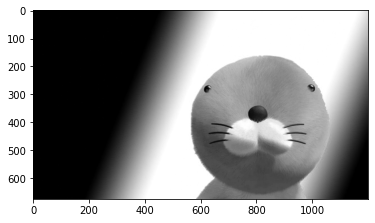

In [ ]:
plt.imshow(g, cmap='gray')

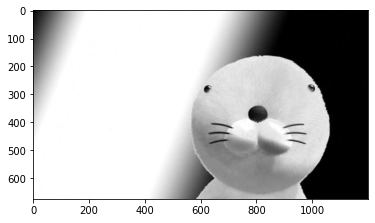

In [ ]:
plt.imshow(b, cmap='gray')



> 이미지 프로세싱

원래의 이미지를 프로그래밍해서 가공하는 방법.



> 이미지 자르기

openCV에서 이미지를 다루기 위해 파이썬에 제공하는 형식은 numpy 배열입니다. <br>

유의할 점은 자르기는 다음과 같이 된다는 것입니다.
```
[top_y:bottom_y, left_x:right_x]
```
```
[y:y+height, x:x+width]
```
채널까지 분리하고 싶으면 다음과 같이 하면 됩니다.
```
[y:y+height, x:x+width, channel]
```
0 = blue, 1 = green, 2 = red

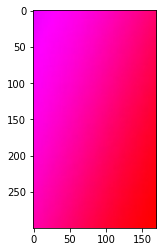

In [ ]:
crop = img[100:400, 130:300] 
plt.imshow(crop)



> 그레이 스케일로 변환

인공지능 학습시 연산량을 줄여 속도를 높이는데 필요한 방법입니다.


```
img = cv2.imread('bonobono.jpg', cv2.IMREAD_GRAYSCALE)
```

하지만 처음에는 컬러로 읽어들이고 필요에 따라 그레이스케일로 변환해야할 때도 있습니다.

`cv2.cvtColor()` 함수로 쉽게 구현할 수 있습니다.



```
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```
는 그레이 스케일로 변환하는 함수입니다.

[COLOR_BGR2GRAY 외의 다른 변환함수들](https://blog.naver.com/PostView.naver?blogId=alsrb968&logNo=220909428222&redirect=Dlog&widgetTypeCall=true&directAccess=false)



In [ ]:
import numpy as np

img2 = img.astype(np.uint16)

#직접 변환
b, g, r = cv2.split(img2)
gray1 = ((b+g+r)/3).astype(np.uint8)

#함수로 변환
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

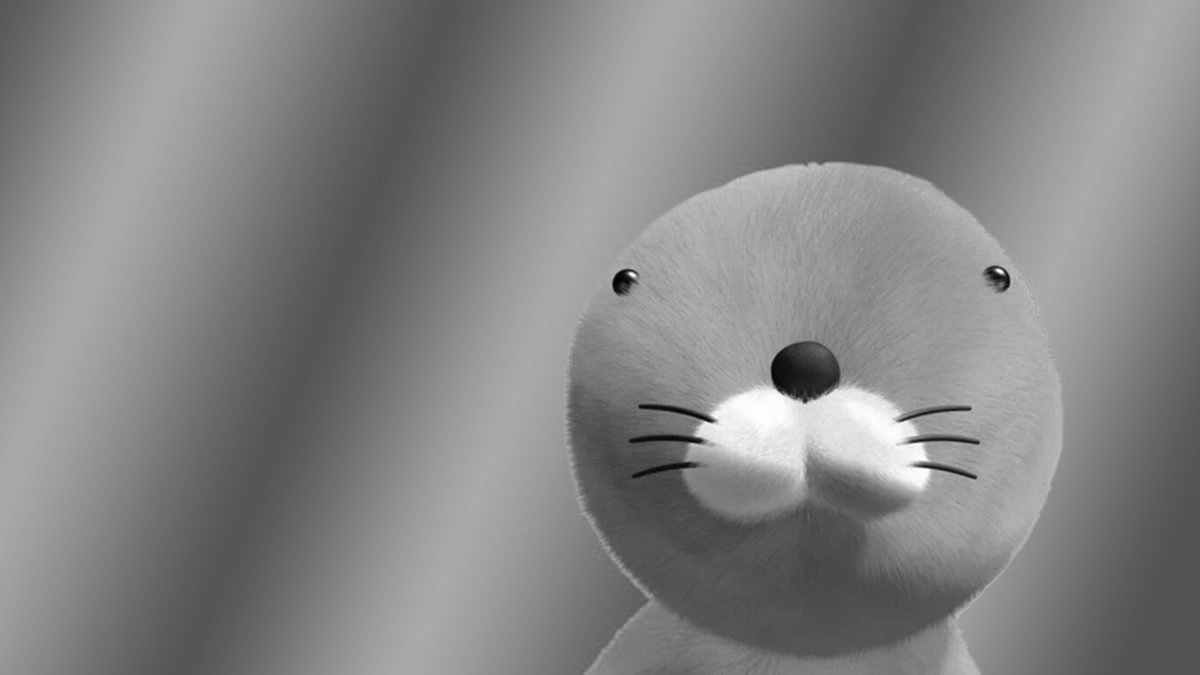

In [ ]:
cv2_imshow(gray1)

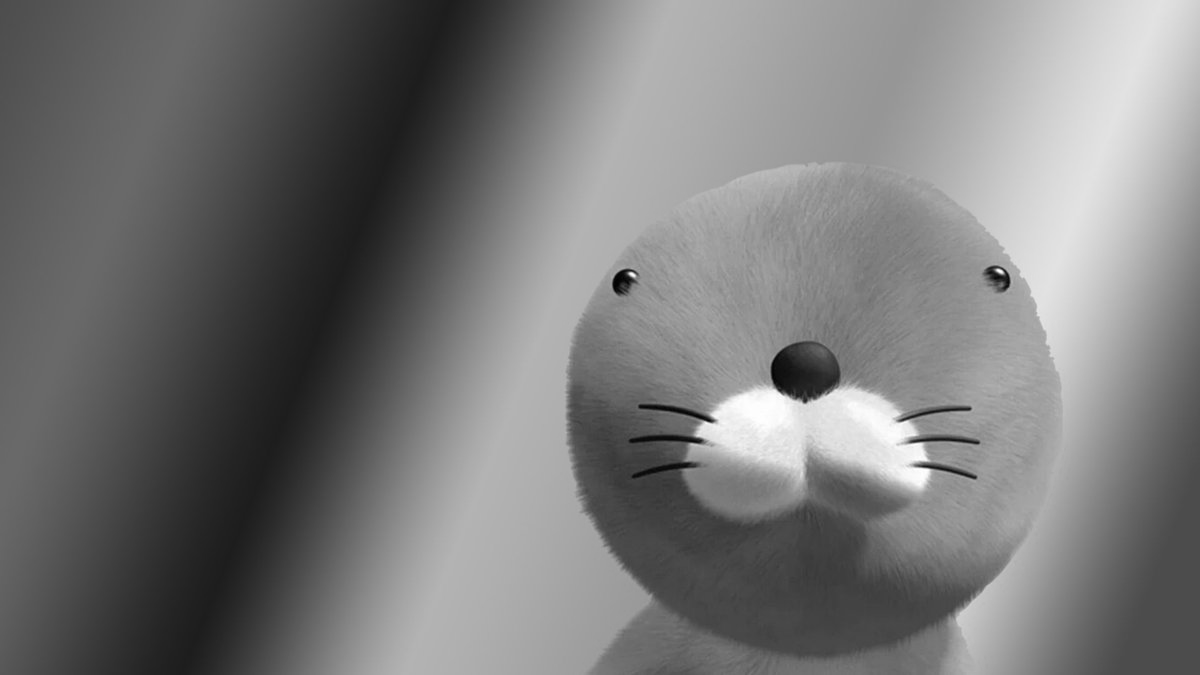

In [ ]:
cv2_imshow(gray2)



> 이진화 이미지

회색 없이 검은색 흰색으로만 이미지 만들기 <br>
즉 이미지에서 원하는 피사체의 모양을 판단하는 방법 <br>
<br><font size="2em" color="gray">
TMI : 스레시홀딩 - 경계점을 기준으로 두 가지 부류로 나누는 방법으로, 이진화 이미지를 만드는 대표적인 방법 <br>


</font>

127.0


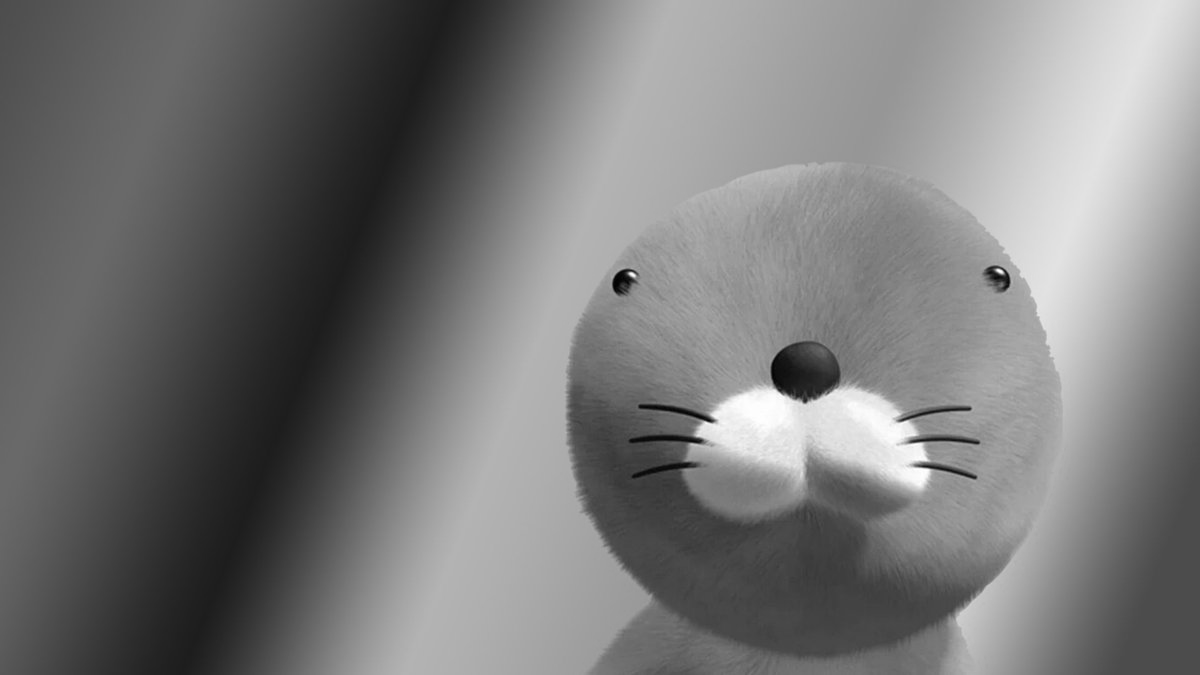

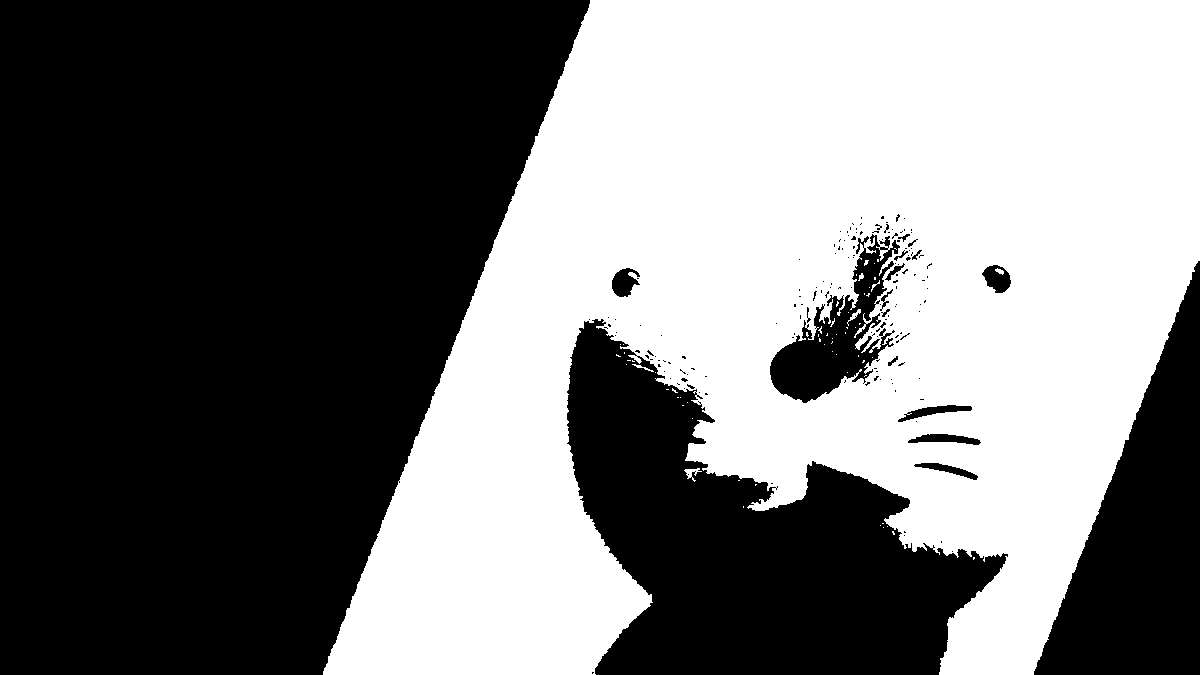

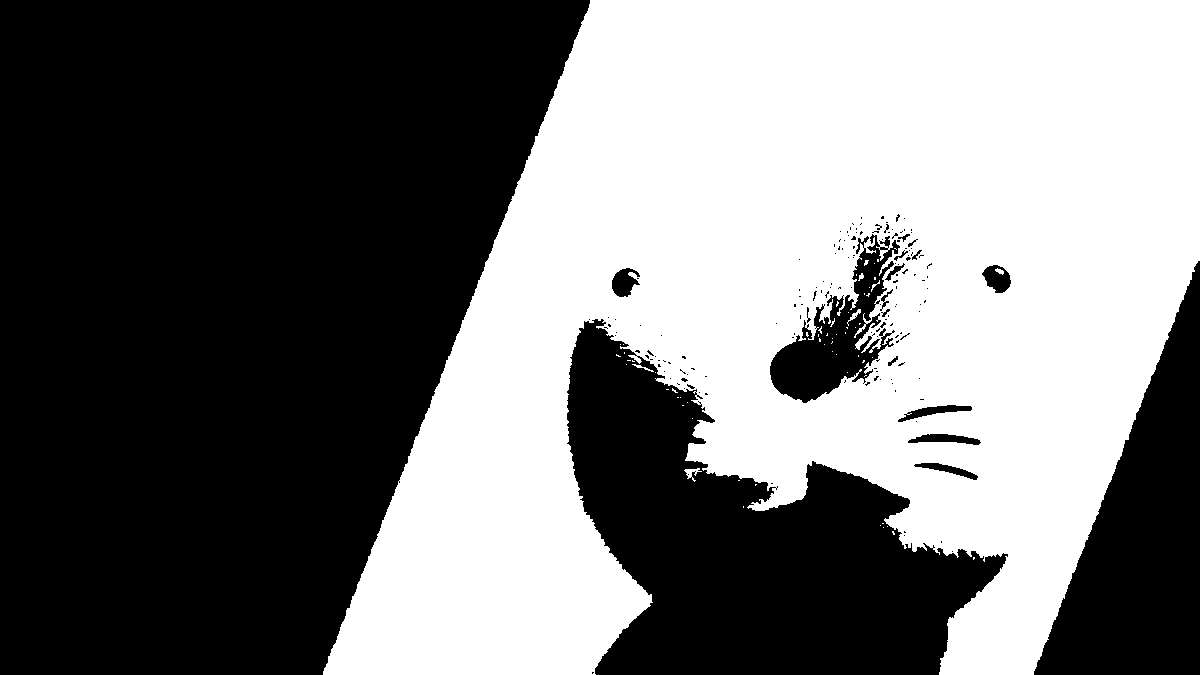

In [ ]:
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh_np=np.zeros_like(imgg)
thresh_np[imgg>127]=255

ret,thresh_cv=cv2.threshold(imgg,127,255,cv2.THRESH_BINARY)
print(ret)

imgs={'Original':imgg,'NumPy API':thresh_np,'cv2.threshold':thresh_cv}
for key,value in imgs.items():
  cv2_imshow(value)



```
 cv2.threshold() 함수에 대해 설명하겠습니다.
 ret,out=cv2.threshold(img,threshold,value,type_flag)
	img: 넘파이 배열, 변환할 이미지
	threshold: 경계 값
	value: 경계 값 기준에 만족하는 픽셀에 적용할 값
	type_flag: 스레시 홀드 적용 방법 지정
		cv2.THRESH_BINARY: 픽셀 값이 경계 값을 넘으면 value를 지정하고, 아니면 0을 지정
		cv2.THRESH_BINARY_INV: cv2.THRESH_BINARY의 반대로 합니다.
		cv2.THRESH_TRUNC: 픽셀 값이 경계로 값을 넘으면 value를 지정하고, 아니면 그대로
							원래의 값을 유지합니다.
		cv2.THRESH_TPZERO: 픽셀 값이 경계 값을 넘으면 원래 값을 유지, 아니면 0을 지정
		cv2.THRESH_TPZERO_INV: cv2.THRESH_TPZERO의 반대로 합니다.
		ret: 스레시홀딩에 사용한 경계 값
		out: 결과 바이너리 이미지

```





> 이미지에 연산하는 방법


```
 dest=cv2.add(): 더하기 함수
 dest=cv2.substract(): 빼기 함수
 dest=cv2.multiply(): 곱하기 함수
 dest=cv2.divide(): 나누기 함수

```

openCV 연산을 사용하는 것이 권장되는 것이, 값이 0~255 범위를 이탈하는 것을 막아줍니다.

Remark. 값이 0이면 검은색에 가깝고, 255면 흰색에 가깝습니다. 이 범위를 이탈하면 이미지가 정상 출력되지 않습니다.

또한 정상적으로 합성하기 위해서는 가중치를 주어 알파 블랜딩을 해야 합니다. 그렇지 않으면 255인 값들이 많아져 그림이 전체적으로 흰색으로 보이게 됩니다.

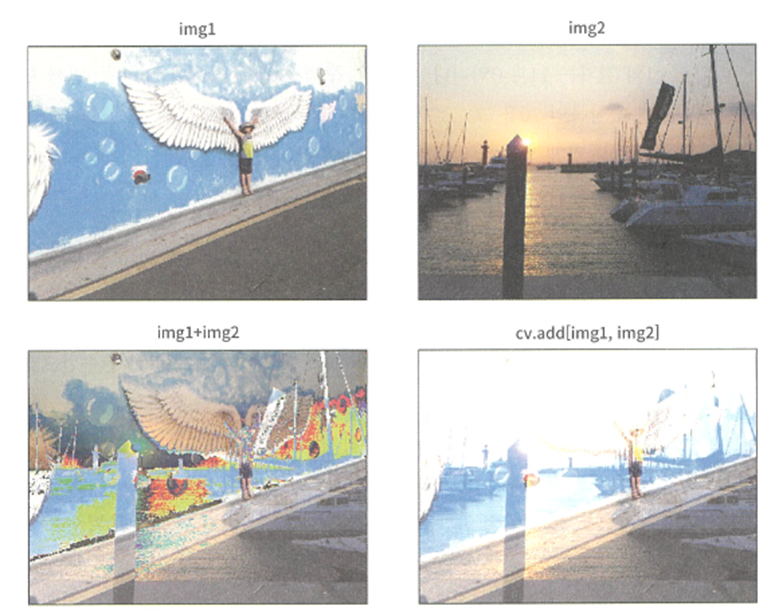


```
 # 블렌딩하는 방법 2가지
 blended=img1*alpha+img2*(1-alpha)


 blended=blended.astype(np.uint8)
 cv2.imshow('img1*alpha+img2*(1-alpha)',blended)

```

